## Predicting Housing Prices in California ##

Import the Required Libraries

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact


## Prepare Data

Import the Dataset into the Notebook

In [2]:
df= pd.read_csv("homes-prices.csv")

The dataset provides information about houses in California and they are distributed across different cities.

The next step is to inspect the Dataset and find out what cleaning steps we need to conduct.

## Explore


In [3]:
df.shape

(186, 15)

The dataframe has 186 rows and 12 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   link              186 non-null    object 
 1   name              184 non-null    object 
 2   price             184 non-null    object 
 3   locality          186 non-null    object 
 4   region            186 non-null    object 
 5   postal_code       186 non-null    int64  
 6   address           186 non-null    object 
 7   latitude          186 non-null    float64
 8   longitude         186 non-null    float64
 9   images            2 non-null      object 
 10  description       186 non-null    object 
 11  bedrooms          186 non-null    int64  
 12  bathrooms         186 non-null    int64  
 13  floor_size_sq_ft  175 non-null    float64
 14  uniq_id           186 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 21.9+ KB


The dataset has columns with missing values.
The datatypes of price and floor__sq_ft is string and needs to be changed to float datatype.So the next step is to clean the dataset and ensure it is ready for use.

Clean the dataset by dropping columns that are irrelevant, changing the datatype of price from string to float and renaming columns

In [5]:
df.drop(columns=["name", "region","images"], inplace = True)
df["city"]=df["locality"]
df.drop(columns="locality", inplace=True)
def clean_price(price_str):
    if isinstance(price_str, str):
        if price_str == "Ask for Price":
            return pd.NA
        clean_str = price_str.replace("$", "").replace(",", "").replace(" ", "").strip()
        try:
            return float(clean_str)
        except ValueError:
            return pd.NA
    return price_str

# Apply the cleaning function to the price column
df["price"] = df["price"].apply(clean_price)

# Replace NaN with 0
df["price"] = df["price"].fillna(0)

# Convert to float (should not raise errors now)
df["price"] = df["price"].astype(float)
df.head()

,link,price,postal_code,address,latitude,longitude,description,bedrooms,bathrooms,floor_size_sq_ft,uniq_id,city
0,https://www.homes.com/property/10125-baffin-dr...,816480.0,92126,10125 Baffin Dr,32.900981,-117.153876,This Single Family Residence is located at 101...,3,2,1134.0,8b174963-ff1e-5783-bd6a-fdfa28999104,San Diego
1,https://www.homes.com/property/78345-terra-cot...,416694.0,92253,78345 Terra Cotta Ct,33.727888,-116.297511,This Condominium is located at 78345 Terra Cot...,2,2,912.0,9add4ef2-73df-5085-972a-70c81dd5b0ac,La Quinta
2,https://www.homes.com/property/469-sandpiper-s...,365040.0,92220,469 Sandpiper St,33.923569,-116.935236,This Single Family Residence is located at 469...,2,2,1471.0,aaab3409-c6c3-5bc3-897c-5b4425492532,Banning
3,https://www.homes.com/property/18620-hatteras-...,366444.0,91356,18620 Hatteras St 257,34.176364,-118.539319,This Condominium is located at 18620 Hatteras ...,2,2,910.0,3f17b279-2a0f-5c56-9bb7-7c998f535953,Tarzana
4,https://www.homes.com/property/2075-mendocino-...,896416.0,93955,2075 Mendocino St,36.620651,-121.829274,This Single Family Residence is located at 207...,3,2,1333.0,01a2f60e-496f-5886-a59d-103097ebb544,Seaside


Now after cleaning the dataset, the next step is to conduct an exploratory data analysis.

Identify unique values and the count of the cities to know which cities are more prevalent than others. 

In [6]:
df["city"].unique
df["city"].value_counts().head(10)

city
San Diego         12
San Jose           6
Santa Rosa         5
Stockton           4
Woodland Hills     3
Bakersfield        3
Modesto            3
Moreno Valley      3
San Bernardino     3
Walnut Creek       3
Name: count, dtype: int64

We can see that the city of San Diego is the most prevalent.

Get the mean price of the houses in all cities in California.

In [7]:
mean_price_by_city =df.groupby("city")["price"].mean().sort_values(ascending=False)

# Print object type, shape, and head
print("mean_price_by_city type:", type(mean_price_by_city))
print("mean_price_by_city shape:", mean_price_by_city.shape)
mean_price_by_city.head()

mean_price_by_city type: <class 'pandas.core.series.Series'>
mean_price_by_city shape: (127,)


city
Laguna Beach     3966074.0
Sherman Oaks     3544838.5
Santa Barbara    3517472.0
Palo Alto        2462992.0
La Jolla         2206513.0
Name: price, dtype: float64

Laguna Beach has the most expensive houses in the real estate.


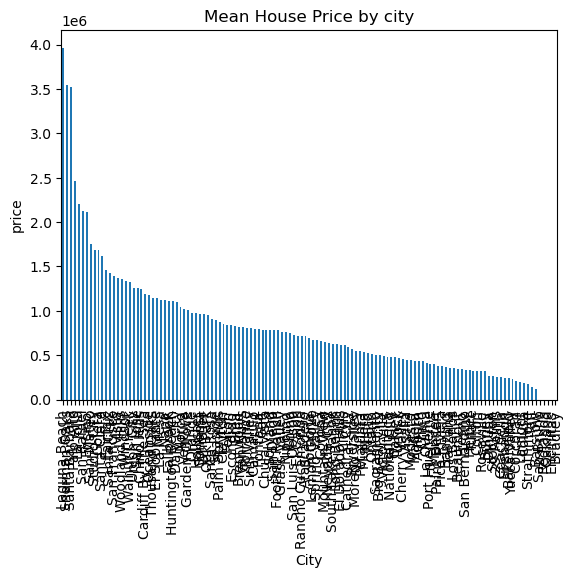

In [8]:
mean_price_by_city.plot(
   kind="bar",
   xlabel="City",
   ylabel="price",
   title="Mean House Price by city");

Let us see the distribution of **sq ft** using a histogram

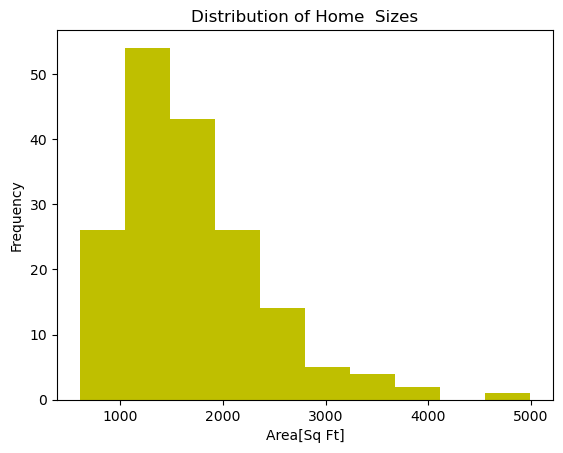

In [9]:
plt.hist(df["floor_size_sq_ft"], color="y")
plt.xlabel("Area[Sq Ft]")
plt.ylabel("Frequency")
plt.title("Distribution of Home  Sizes");


The histogram shows that most properties are between 1000 and 2000 sq ft and very few are between 4000 and 5000 sq ft.

In [10]:
df["price_per_ft"] = df["price"]/df["floor_size_sq_ft"]
mean_price_by_ft =df.groupby("city")["price_per_ft"].mean().sort_values(ascending=False)
mean_price_by_ft

city
Palo Alto             1496.349939
San Mateo             1256.117143
Santa Barbara         1212.921379
Cardiff By The Sea    1173.310958
Sherman Oaks          1149.968831
                         ...     
Nevada City                   NaN
Redlands                      NaN
San Bruno                     NaN
San Francisco                 NaN
Solvang                       NaN
Name: price_per_ft, Length: 127, dtype: float64

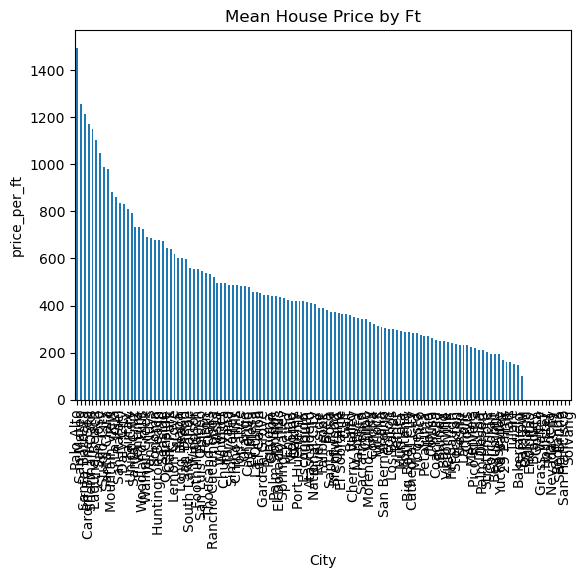

In [11]:
mean_price_by_ft.plot(
   kind="bar",
   xlabel="City",
   ylabel="price_per_ft",
   title="Mean House Price by Ft");

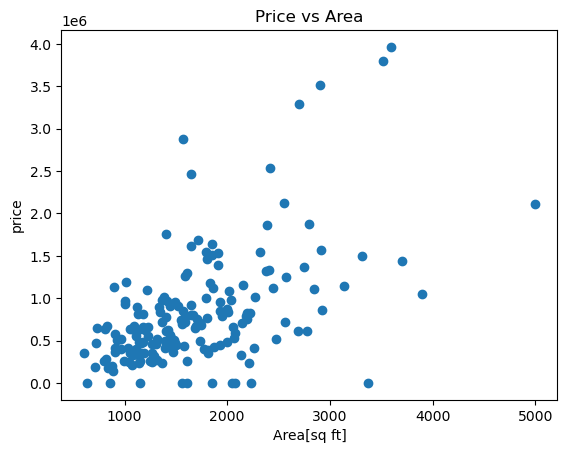

In [12]:
plt.scatter(x=df["floor_size_sq_ft"], y=df["price"])
plt.xlabel("Area[sq ft]")
plt.ylabel("price")
plt.title("Price vs Area");

There is a positive correlation since the price increases as the house size increases. It can also be noted that the houses are more densed in the 1000 to 2000 sq ft area. This plot reflects what we had seen in the histogram plot earlier

Now let's quantify this correlation by using the Pearson correlation coefficient

In [13]:
p_correlation = df["floor_size_sq_ft"].corr(df["price"])
p_correlation

0.5344845025871561

Therefore, the correlation between price and area is positive and moderate

The next thing we need to look out for are categorical columns with low or high cardinality. If there's only one category in a column, it won't provide any unique information to our model. At the other extreme, columns where nearly every row has its own category won't help our model in identifying useful trends in the data.

In [14]:
df.select_dtypes("object").head()

,link,address,description,uniq_id,city
0,https://www.homes.com/property/10125-baffin-dr...,10125 Baffin Dr,This Single Family Residence is located at 101...,8b174963-ff1e-5783-bd6a-fdfa28999104,San Diego
1,https://www.homes.com/property/78345-terra-cot...,78345 Terra Cotta Ct,This Condominium is located at 78345 Terra Cot...,9add4ef2-73df-5085-972a-70c81dd5b0ac,La Quinta
2,https://www.homes.com/property/469-sandpiper-s...,469 Sandpiper St,This Single Family Residence is located at 469...,aaab3409-c6c3-5bc3-897c-5b4425492532,Banning
3,https://www.homes.com/property/18620-hatteras-...,18620 Hatteras St 257,This Condominium is located at 18620 Hatteras ...,3f17b279-2a0f-5c56-9bb7-7c998f535953,Tarzana
4,https://www.homes.com/property/2075-mendocino-...,2075 Mendocino St,This Single Family Residence is located at 207...,01a2f60e-496f-5886-a59d-103097ebb544,Seaside


In [15]:
df.select_dtypes("object").nunique()

link           186
address        186
description    186
uniq_id        186
city           127
dtype: int64

The categorical variables that need to be dropped are the first three and uniq_id. There are no values with low cardinality.

In [16]:
df.drop(columns=["link", "address", "description", "uniq_id"], inplace=True)


It's also important for us to drop any columns that would constitute leakage, that is, features that were created using our target or that would give our model information that it won't have access to when it's deployed

In [17]:
sorted(df.columns)

['bathrooms',
 'bedrooms',
 'city',
 'floor_size_sq_ft',
 'latitude',
 'longitude',
 'postal_code',
 'price',
 'price_per_ft']

From the columns above, price_per_ft and postal code need to be dropped as they give the model information that the model could 
not otherwise have accessed in the real world.

In [18]:
df.drop(columns=["price_per_ft", "postal_code"], inplace=True)

We also need to keep an eye out for multicollinearity, that is, features in our feature matrix that are highly correlated with each other. A good way to detect this is to use a heatmap. 

In [19]:
sorted(df.columns)

['bathrooms',
 'bedrooms',
 'city',
 'floor_size_sq_ft',
 'latitude',
 'longitude',
 'price']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             186 non-null    float64
 1   latitude          186 non-null    float64
 2   longitude         186 non-null    float64
 3   bedrooms          186 non-null    int64  
 4   bathrooms         186 non-null    int64  
 5   floor_size_sq_ft  175 non-null    float64
 6   city              186 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 10.3+ KB


In [21]:
df["bedrooms"]=df["bedrooms"].astype(int)

<Axes: >

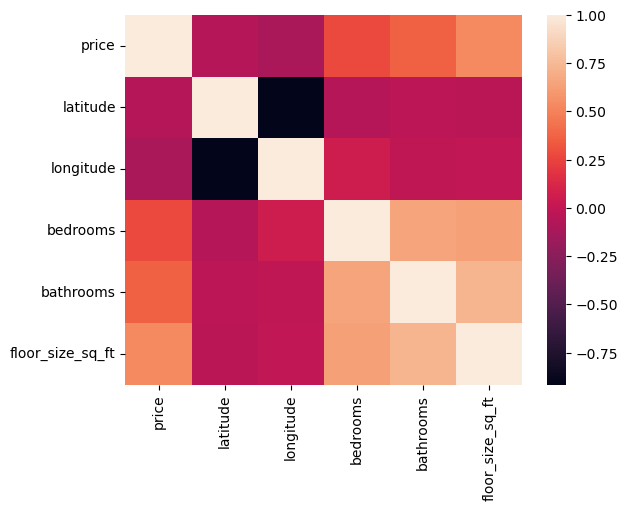

In [22]:
corr= df.select_dtypes("number").corr()
sns.heatmap(corr)

We are going to retain the shown features for use in the model.

## Split Data

The next step is to create the feature matrix and the target vector. The features include all the columns remaining while the target is the price column.


In [41]:
df.head()

,price,latitude,longitude,bedrooms,bathrooms,floor_size_sq_ft,city
0,816480.0,32.900981,-117.153876,3,2,1134.0,San Diego
1,416694.0,33.727888,-116.297511,2,2,912.0,La Quinta
2,365040.0,33.923569,-116.935236,2,2,1471.0,Banning
3,366444.0,34.176364,-118.539319,2,2,910.0,Tarzana
4,896416.0,36.620651,-121.829274,3,2,1333.0,Seaside


In [29]:
target=df["price"]
features=df[["bedrooms", "bathrooms", "floor_size_sq_ft","latitude","longitude", "city"]]
y_train=target
X_train=features

# Build Model

### Baseline

Baselining helps us know if a model will perform well. The next step is to calculate the baseline mean absolute error for the model.

In [30]:
y_mean= y_train.mean()
y_pred_baseline= [y_mean] *len(y_train)
baseline_mae = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price:", y_mean)

print("Baseline MAE:", baseline_mae)

Mean apt price: 811257.5322580645
Baseline MAE: 453842.5026014568


The mean apartment price is 811257.5322580645 means our prediction will be off by an average of 453842.5026014568.
Also, our model needs to have mean absolute error below 453842.5026014568 in order to be useful.

### Iterate

We create a pipeline named model that contains a OneHotEncoder, SimpleImputer, and Ridge predictor.

In [25]:
# !pip install category_encoders 

from category_encoders import OneHotEncoder

In [31]:
ohe=OneHotEncoder(use_cat_names= True)
ohe.fit(X_train)
XT_train =ohe.transform(X_train)
model = make_pipeline(OneHotEncoder(use_cat_names= True),SimpleImputer(),
                      Ridge()
                     )
model.fit(X_train, y_train)
model.predict(X_train)

array([ 678546.28425666,  248313.4736378 ,  418163.79273168,
        456955.96224859,  947695.10524665, 1005730.13574667,
       1517333.03784711,  736383.65691465,  313405.49826423,
        793053.15033958, 1146900.45240526,  208444.62056012,
       1211221.3214348 ,  921189.93728506, 1517949.69098941,
       1091890.31832736,  908378.31860306,  944186.69240177,
        441311.72773214,  256655.86771055,  192700.07261202,
        714191.35737539, 1332381.41229992,  586402.49479721,
        942969.08550562,  865763.90606144,  754683.18851774,
        297634.90605593,  872101.17974562,  907329.2182685 ,
        395788.99566916, 1288395.52150856,  757232.67939889,
        328765.85728473,  564170.03145002,  981724.46211248,
       1314234.61142969,  356249.76038524,  634460.60878723,
        391203.98488402,  620404.75008546, 1386524.89613133,
        836939.72804636,  751962.86926619,  564376.79153587,
        594290.42329435,  881586.9377322 ,  489313.60653226,
       1082198.82325384,

## Evaluate

The next step is to calculate the training mean absolute error for the predictions as compared to the true targets in y_train.

In [34]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train,y_pred_training))


Training MAE: 185215.19645619375


Now that we have established that the MAE is significantly lower than the baseline we can proceed to deploy the model.

## Deploying the Model

We will deploy the model in two different ways. One is by using a function and the second is creating an interactive dashboard

### Function

In [43]:
def make_prediction(bedrooms, bathrooms, area,lat, lon,city):
    data={
        "bedrooms":bedrooms,
        "bathrooms": bathrooms,
        "floor_size_sq_ft":area,
        "latitude":lat,
        "longitude":lon,
        "city": city
    }
    df=pd.DataFrame(data, index=[0])
    prediction =model.predict(df).round(2)[0]
    
    return f"Predicted apartment price: ${prediction}"

In [44]:
make_prediction(3,4,12345, 33.727888, -116.297511, "La Quinta")

'Predicted apartment price: $5803264.36'

### Interactive Dashboard

Create an interact function in Jupyter Widgets.

In [45]:
interact(
    make_prediction,
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),
        value=X_train["bedrooms"].mean(),
    ),
     bathrooms=IntSlider(
        min=X_train["bathrooms"].min(),
        max=X_train["bathrooms"].max(),
        value=X_train["bathrooms"].mean(),
    ),
    area=IntSlider(
        min=X_train["floor_size_sq_ft"].min(),
        max=X_train["floor_size_sq_ft"].max(),
        value=X_train["floor_size_sq_ft"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["latitude"].min(),
        max=X_train["latitude"].max(),
        step=0.01,
        value=X_train["latitude"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["longitude"].min(),
        max=X_train["longitude"].max(),
        step=0.01,
        value=X_train["longitude"].mean(),
    ),
    city=Dropdown(options=sorted(X_train["city"].unique())),
);

interactive(children=(IntSlider(value=3, description='bedrooms', max=6), IntSlider(value=2, description='bathr…